In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# chengede

In [6]:
def j_E(E, n, T):
    return n**2*T**(-0.5)*np.exp(-E/T)


In [7]:
Be6_data = np.loadtxt('Be6micm.txt')
Be12_data = np.loadtxt('Be12micm.txt')
Egrid = Be6_data[:,0]
Be6trans = Be6_data[:,1] 
Be12trans = Be12_data[:,1] 

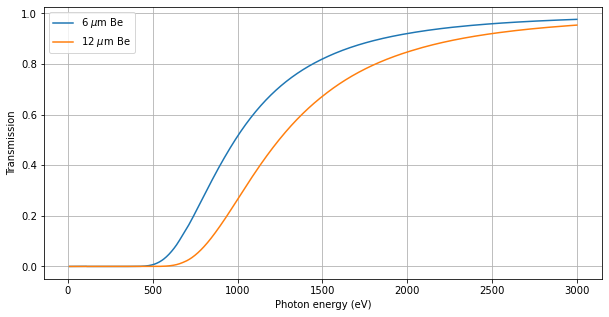

In [10]:
plt.figure(figsize=(10,5))
plt.plot(Egrid, Be6trans, label=r'6 $\mu$m Be')
plt.plot(Egrid, Be12trans, label=r'12 $\mu$m Be')
plt.grid()
plt.xlabel('Photon energy (eV)')
plt.ylabel('Transmission')
plt.legend()

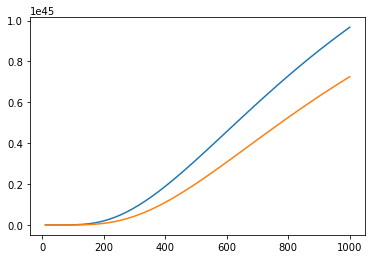

In [17]:
j1d = j_E(E=Egrid, n=1e22, T=20)
L = 1
I1d = L*j1d
n1 = 1e22

def Ni(Earray,T, Warray):

    if Earray.shape[0] != Warray.shape[0]:
        print('Error. Earray must have the same shape as Warray')

    jarray = j_E(E=Earray, n=n1, T=T)
    return np.trapz(jarray*Warray, Earray)

    

Tarray = np.linspace(10, 1000)
N6array = np.zeros_like(Tarray)
N12array = np.zeros_like(Tarray)

for i in range(Tarray.shape[0]):
    N6array[i] = Ni(Earray=Egrid, T=Tarray[i], Warray=Be6trans)
    N12array[i] = Ni(Earray=Egrid, T=Tarray[i], Warray=Be12trans)
plt.plot(Tarray, N6array)
plt.plot(Tarray, N12array)



    
